In [280]:
import os
from utilities import read_files
import csv
import pandas as pd
from itertools import combinations
import sys

In [11]:
files = read_files("./results")
files

['./results/codegemma_7b/ActionTest_cluster.txt',
 './results/codegemma_7b/ActionTest_folder.txt',
 './results/codegemma_7b/AHFCoreLib_cluster.txt',
 './results/codegemma_7b/AHFCoreLib_folder.txt',
 './results/codegemma_7b/AHFNorwayTopics_cluster.txt',
 './results/codegemma_7b/AHFNorwayTopics_folder.txt',
 './results/codegemma_7b/AHFProfileLib_cluster.txt',
 './results/codegemma_7b/AHFProfileLib_folder.txt',
 './results/codegemma_7b/AHFSequences_cluster.txt',
 './results/codegemma_7b/AHFSequences_folder.txt',
 './results/codegemma_7b/AliasImport_cluster.txt',
 './results/codegemma_7b/AliasImport_folder.txt',
 './results/codegemma_7b/AliasTest_cluster.txt',
 './results/codegemma_7b/AliasTest_folder.txt',
 './results/codegemma_7b/AllocationTest_cluster.txt',
 './results/codegemma_7b/AllocationTest_folder.txt',
 './results/codegemma_7b/AnalysisAnnotation_cluster.txt',
 './results/codegemma_7b/AnalysisAnnotation_folder.txt',
 './results/codegemma_7b/AnalysisIndividualExample_cluster.txt',


In [12]:
ground_truth = read_files("./data/examples")
ground_truth = [file for file in ground_truth if file.endswith(".sysml")]
ground_truth

['./data/examples/Analysis Examples/AnalysisAnnotation.sysml',
 './data/examples/Analysis Examples/Dynamics.sysml',
 './data/examples/Analysis Examples/Turbojet Stage Analysis.sysml',
 './data/examples/Analysis Examples/Vehicle Analysis Demo.sysml',
 './data/examples/Arrowhead Framework Example/AHFCoreLib.sysml',
 './data/examples/Arrowhead Framework Example/AHFNorwayTopics.sysml',
 './data/examples/Arrowhead Framework Example/AHFProfileLib.sysml',
 './data/examples/Arrowhead Framework Example/AHFSequences.sysml',
 './data/examples/Camera Example/Camera.sysml',
 './data/examples/Camera Example/PictureTaking.sysml',
 './data/examples/Cause and Effect Examples/CauseAndEffectExample.sysml',
 './data/examples/Cause and Effect Examples/MedicalDeviceFailure.sysml',
 './data/examples/Comment Examples/Comments.sysml',
 './data/examples/Flashlight Example/Flashlight Example.sysml',
 './data/examples/Geometry Examples/CarWithEnvelopingShape.sysml',
 './data/examples/Geometry Examples/CarWithShap

In [13]:
filter_files = read_files("./results/gemma_7b")
filter_files = [file.split("/")[-1].split("_")[0] for file in filter_files]
filter_files

['AHFSequences',
 'AHFSequences',
 'AllocationTest',
 'AllocationTest',
 'AnalysisAnnotation',
 'AnalysisAnnotation',
 'Camera',
 'Camera',
 'DependencyTest',
 'DependencyTest',
 'EnumerationTest',
 'EnumerationTest',
 'Flashlight Example',
 'Flashlight Example',
 'PacketUsage',
 'PacketUsage',
 'PartTest',
 'PartTest',
 'ServerSequenceOutsideRealization-3',
 'ServerSequenceOutsideRealization-3',
 'TextualRepresentationTest',
 'TextualRepresentationTest',
 'TradeStudyTest',
 'TradeStudyTest',
 'Vehicle Analysis Demo',
 'Vehicle Analysis Demo',
 'Vehicle Decomposition - Updated',
 'Vehicle Decomposition - Updated',
 'VehicleDefinitions',
 'VehicleDefinitions']

In [14]:
gd = []
for file in filter_files:
    for file_ in ground_truth:
        if file in file_:
            gd.append(file_)

gd = list(set(gd))
gd

['./data/examples/Arrowhead Framework Example/AHFSequences.sysml',
 './data/examples/Analysis Examples/Vehicle Analysis Demo.sysml',
 './data/examples/Simple Tests/EnumerationTest.sysml',
 './data/examples/Flashlight Example/Flashlight Example.sysml',
 './data/examples/Camera Example/PictureTaking.sysml',
 './data/examples/Interaction Sequencing Examples/ServerSequenceOutsideRealization-3.sysml',
 './data/examples/Camera Example/Camera.sysml',
 './data/examples/Packet Example/PacketUsage.sysml',
 './data/examples/Simple Tests/TextualRepresentationTest.sysml',
 './data/examples/Simple Tests/PartTest.sysml',
 './data/examples/v1 Spec Examples/8.4.5 Constraining Decomposition/Vehicle Decomposition - Updated.sysml',
 './data/examples/Vehicle Example/VehicleDefinitions.sysml',
 './data/examples/Simple Tests/TradeStudyTest.sysml',
 './data/examples/Simple Tests/AllocationTest.sysml',
 './data/examples/Analysis Examples/AnalysisAnnotation.sysml',
 './data/examples/Simple Tests/DependencyTest.

In [15]:
def count_tokens(file):
    with open(file, "r") as f:
        return len(f.read().split())

def compare_token_count(file):
    nb_tokens = count_tokens(file)
    ground_truth_file = [file_ for file_ in ground_truth if file.split("/")[-1].split("_")[0] in file_][0]
    nb_tokens_gt = count_tokens(ground_truth_file)
    return nb_tokens - nb_tokens_gt    

In [16]:
csv_writer = csv.writer(open("metrics.csv", "w"))

csv_writer.writerow(["file", "model", "nb_tokens", "nb_tokens_diff"])
for file in files:
    model = file.split("/")[2]
    csv_writer.writerow([file, model, count_tokens(file), compare_token_count(file)])

In [17]:
df = pd.read_csv("metrics.csv")

df_gemma7 = df[df["model"] == "gemma_7b"]
df_gemma7.describe()

,nb_tokens,nb_tokens_diff
count,30.000000,30.00000
mean,89.466667,-115.20000
std,58.815160,200.41223
min,11.000000,-740.00000
25%,46.750000,-125.50000
50%,81.000000,-41.00000
75%,126.750000,-11.25000
max,258.000000,91.00000


In [18]:
df_codegemma = df[df["model"] == "codegemma_7b"]
df_codegemma.describe()

,nb_tokens,nb_tokens_diff
count,178.000000,178.00000
mean,137.662921,-48.41573
std,81.276670,194.12011
min,23.000000,-917.00000
25%,72.000000,-69.75000
50%,121.000000,-3.00000
75%,192.750000,40.75000
max,376.000000,247.00000


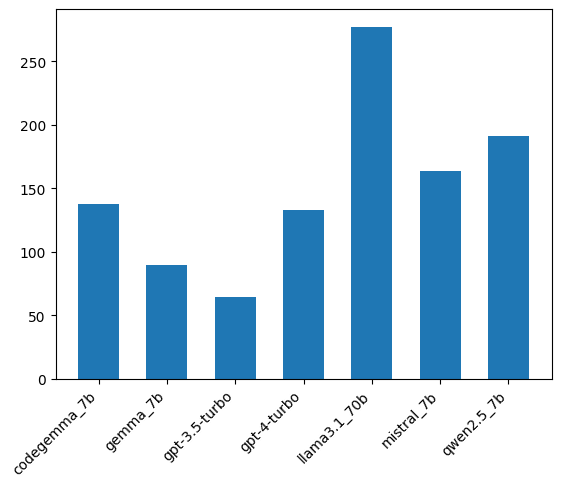

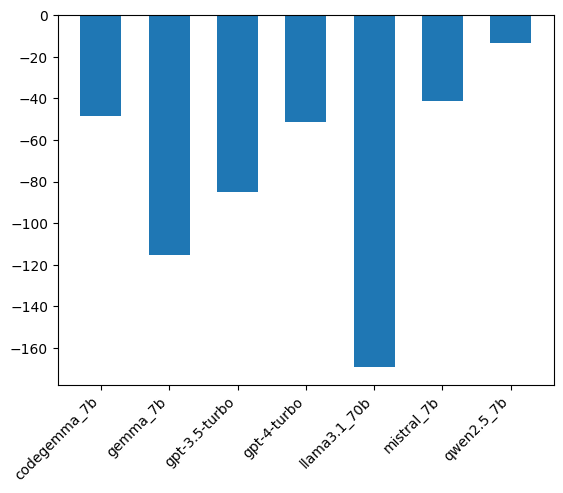

In [23]:
mean_verbosity = [df[df["model"] == model]["nb_tokens"].mean() for model in df["model"].unique()]
models = df["model"].unique()

mean_diff = [df[df["model"] == model]["nb_tokens_diff"].mean() for model in df["model"].unique()]
import matplotlib.pyplot as plt
positions = range(len(models))

plt.bar(models, mean_verbosity, width=0.6)
plt.xticks(positions, models, rotation=45, ha='right', fontsize=10)  # Adjust `rotation`, `ha`, and `fontsize` as needed
plt.show()

plt.bar(models, mean_diff, width=0.6)
plt.xticks(positions, models, rotation=45, ha='right', fontsize=10)  # Adjust `rotation`, `ha`, and `fontsize` as needed
plt.show()

# ROUGE Metric

## Unigrams

In [272]:
def precision_metric_unigram(response, ground_truth):
    response = response.split(" ")
    ground_truth = ground_truth.split(" ")
    return len(set(response).intersection(set(ground_truth))) / len(response)

def recall_metric_unigram(response, ground_truth):
    response = response.split(" ")
    ground_truth = ground_truth.split(" ")
    return len(set(response).intersection(set(ground_truth))) / len(ground_truth)

def f1_metric_unigram(response, ground_truth):
    precision = precision_metric_unigram(response, ground_truth)
    recall = recall_metric_unigram(response, ground_truth)
    return 2 * (precision * recall) / (precision + recall)

## Ngrams

In [273]:
def intersection_ngrams(response, ground_truth, n):
    response = response.split(" ")
    ground_truth = ground_truth.split(" ")
    response_ngrams = [" ".join(response[i:i+n]) for i in range(len(response)-n+1)]
    ground_truth_ngrams = [" ".join(ground_truth[i:i+n]) for i in range(len(ground_truth)-n+1)]
    return response_ngrams, ground_truth_ngrams

def precision_ngrams(response, ground_truth, n):
    response_ngrams, ground_truth_ngrams = intersection_ngrams(response, ground_truth, n)
    return len(set(response_ngrams).intersection(set(ground_truth_ngrams))) / len(response_ngrams)

def recall_ngrams(response, ground_truth, n):
    response_ngrams, ground_truth_ngrams = intersection_ngrams(response, ground_truth, n)
    return len(set(response_ngrams).intersection(set(ground_truth_ngrams))) / len(ground_truth_ngrams)

def f1_ngrams(response, ground_truth, n):
    precision = precision_ngrams(response, ground_truth, n)
    recall = recall_ngrams(response, ground_truth, n)
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)


## Non consecutive ngrams / Longuest common sentence

In [274]:
def get_all_combinations(text):
    text = text.split(" ")
    all_combinations = []
    for i in range(len(text)):
        all_combinations.append([text[i]])
        for j in range(i+1, len(text)):
            combination = [text[k] for k in range(i, j)] + [text[j]]
            all_combinations.append(combination)
            for k in range(j+1, len(text)):
                combination = [text[r] for r in range(i, j+1)] + [text[k]] 
                all_combinations.append(combination)
    
    unique = [list(comb) for comb in set([tuple(comb) for comb in all_combinations])]
    return unique

def intersection_LCS(ngrams_response, ngrams_ground_truth):
    count = []
    for item in ngrams_response:
        if item in ngrams_ground_truth:
            count.append(item)
    return max(count, key=len)

def precision_ngrams_nonconsecutive(response, ground_truth):
    response_ngrams = get_all_combinations(response)
    ground_truth_ngrams = get_all_combinations(ground_truth)
    return len(intersection_LCS(response_ngrams, ground_truth_ngrams)) / len(response.split(" "))

def recall_ngrams_nonconsecutive(response, ground_truth):
    response_ngrams = get_all_combinations(response)
    ground_truth_ngrams = get_all_combinations(ground_truth)
    return len(intersection_LCS(response_ngrams, ground_truth_ngrams)) / len(ground_truth.split(" "))

def f1_ngrams_nonconsecutive(response, ground_truth):
    precision = precision_ngrams_nonconsecutive(response, ground_truth)
    recall = recall_ngrams_nonconsecutive(response, ground_truth)
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)


In [275]:
gd = "The cat is on the mat"
test = "The cat and the dog"

precision_metric(test, gd)
recall_metric(test, gd)
f1_metric(test, gd)

0.5454545454545454

# BLEU Metric

In [279]:
def mean_blue(response, ground_truth, n):
    vals = []
    for i in range(1, n+1):
        vals.append(precision_ngrams(response, ground_truth, i))

    return sum(vals)/len(vals)

def blue_score(response, ground_truth, bp):
    mean_blue_score = mean_blue(response, ground_truth, n)
    return mean_blue_score * bp

# Functional correctness

In [1]:
import sys

In [2]:
sys.path.insert(0,'C:/Users/z004x5km/OneDrive - Siemens AG/Desktop/Ressources ext/SysMLv2RepositoryClient/lib/python')

In [3]:
def syslmv2_syntax_checker_function(sysmlv2_textual_code: str):
    from dist import com_siemens_advsol_sysml_common_parser_SiemensParser as SiemensParser
    from dist import com_siemens_advsol_sysml_common_parser_Content as Content
    from dist import com_siemens_advsol_sysml_client_impl_SysMLv2RepositoryImpl as SysMLv2RepositoryImpl
    from dist import com_siemens_advsol_sysml_common_scope_impl_ProjectScopeBuilder as ProjectScopeBuilder
    from dist import com_siemens_advsol_sysml_common_util_Util as Util
    from dist import com_siemens_advsol_sysml_common_lang_DerivedPropertyHelper as DerivedPropertyHelper
    from dist import com_siemens_advsol_sysml_common_util_serialization_BaseSerialization as BaseSerialization
    from dist import com_siemens_advsol_sysml_common_util_Util as Util

    import re
    text_file = open("Example.sysml", "w")
    text_file.write(sysmlv2_textual_code)
    text_file.close()
    content = Content.withText("input.sysml", sysmlv2_textual_code)
    # content = Content.withStream("Example.sysml", File.read("Example.sysml"))
    #content = Content.withStream("Example.sysml", "package { hello }")
    parser = SiemensParser();

    # parser = RefImplParser()
    result = parser.toJsonString([content])
 
    raw = parser.getLastLogData().stdout()
    x = re.findall("ERROR:(.*?)(?=\n|$)", str(raw))
 
    if not x:
        output = "the SysML V2 code contains no error"
    else:
        output ="Your code contains error:\n"
        for error in x:
            output = output + error.replace("Example.sysml","") + "\n"
    return(output)

In [4]:
text = """part system_of_systems:SysLocalCloudsDD;

part def LocalCloudDesign {
    doc /* Local Cloud definition */

    part systems:SysD[1..*];
}

part def SysD {
    doc /* System definitions */

    port services: SD[1..*];
    attribute systemname: String;
    attribute address: String;
    attribute portno: Integer;
}

port def IDD :> SD{
    doc /* Interface Design Description of services */

    attribute encoding_kind:String;
}

port def SDDD :> SD{
    doc /* Service Definition Design Description */

    port idds:IDD[*];
}

part def SysLocalCloudsDD :> SysLocalCloudsDesign {
    doc /* System of Systems Detailed Description */

    part :>> locclouds:LocalCloudDD[1..*];
}

part def LocalCloudDD :> LocalCloudDesign {
    part :>> systems:SysDD[1..*];
}

part def SysDD :> SysD{
    doc /* System Detailed Description */

    port :>> services:SDDD;
    action ServiceMethod[1..*];
}

event def TellUConsumerRequest{data:String};

event def APISProducerResponse{data:String};

message def MQTTMessage{data:String};

sequenceDiagram def SequenceDiagram1 {
    participant TellUConsumer;
    participant APISProducer;
    participant MQTTServer;
    participant APISConsumer;

    TellUConsumer->>TellUConsumerRequest;
    activate TellUConsumer;
    TellUConsumer->>MQTTServer!MQTTMessage(data: tellUConsumerRequest.data);

    activate MQTTServer;
    MQTTServer->>MQTTMessage(data: tellUConsumerRequest.data);

    deactivate MQTTServer;
    activate APISProducer;
    MQTTServer->>APISProducerResponse;
    APISProducer->>APISPProducerResponse;

    deactivate APISProducer;
    activate APISConsumer;
    APISConsumer->>MQTTServer!MQTTMessage(data: APISProducerResponse.data);

    deactivate MQTTServer;
    deactivate TellUConsumer;
}"""

In [5]:
syslmv2_syntax_checker_function(text)

AttributeError: 'com_siemens_advsol_sysml_common_parser_SiemensParser' object has no attribute 'toJsonString'